# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
drive_path = '/content/drive/MyDrive/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
import pandas as pd
# Open a dataset from your project folder in Google Drive, loading all rows initially
# Load your CSV fil


In [5]:
import os
print(os.listdir('/content/drive/MyDrive/'))

['Copy of Copy of Pattern Matching Online Version (2).gslides', 'Copy of Copy of Pattern Matching Online Version (1).gslides', 'chem notes.gdoc', 'Copy of Copy of Pattern Matching Online Version.gslides', 'Recitation%203%20Homework.pdf', 'Recitation%203%20Homework (1).gdoc', 'Untitled document (25).gdoc', 'Recitation%203%20Homework.gdoc', 'lab .gdoc', 'Russian fairy tales.gdoc', 'Bio.gdoc', 'french kiss.gdoc', 'Bio Unit 3, 2.7 .gdoc', 'Untitled document (24).gdoc', 'Bio Unit 3, 10 25 .gdoc', 'Unit 3, 10 23.gdoc', 'russian fairy tales unit 2.gdoc', 'Worksheet: Sarrasine.gdoc', 'french kiss final.gdoc', 'russian fairy tales unit 3.gdoc', 'French Kiss Final  .gdoc', 'Bio 2 notes Unit 1.gdoc', 'Essay 1 .gdoc', 'English Seminar Essay 1.gdoc', 'English Seminar Essay 1.docx', 'History.gdoc', 'Bio Exam 1 1 30 notes .gdoc', 'Untitled document (23).gdoc', 'Untitled document (22).gdoc', 'Untitled document (21).gdoc', 'Midterm History .gdoc', 'Untitled document (20).gdoc', "Byrd's diary .gdoc", 'M

In [6]:
import os
print(os.listdir('/content/drive/MyDrive/Econ_0150_Project/'))

['Econ Final.csv', 'Econ Final.gsheet', 'Copy of Project_Template.ipynb']


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [13]:
# Data operations here
# Load the CSV file into a DataFrame named 'data'
data = pd.read_csv('Econ Final.csv')

# Preview the first few rows of raw data to identify the start of actual data
print("Raw Data Head (first 10 rows):")
display(data.head(10))

# Drop rows where all values are NaN (to remove completely empty rows)
data = data.dropna(how='all')

# Reset index after dropping all-NaN rows
data = data.reset_index(drop=True)

# Drop the first column (original index 0) which appears to be empty/unneeded
# This 'if' condition will not be met if columns are already named as strings
if 0 in data.columns:
    data = data.drop(columns=[0])

# Find the first row that is 'Federal' as it's the first actual data point
# Use the actual column name 'State or Territory' instead of 'State_Temp'
federal_row_index = data[data['State or Territory'] == 'Federal'].index[0]

# Slice the DataFrame from the identified data start row ('Federal')
data = data.loc[federal_row_index:].copy()
data = data.reset_index(drop=True)

# Now, rename columns properly using a dictionary mapping current names to desired names
new_col_names_map = {
    'State or Territory': 'State',
    'MinimumWage': 'MinimumWage', # This column name is already correct
    'Unemp_rate ': 'UnemploymentRate' # Corrected: Rename 'Unemp_rate ' (with space) to 'UnemploymentRate'
}
data = data.rename(columns=new_col_names_map)

print("Column names after renaming:")
print(data.columns)

# Clean 'MinimumWage' column: remove '$' and convert to numeric
data['MinimumWage'] = data['MinimumWage'].astype(str).str.replace('$', '', regex=False).str.strip()
data['MinimumWage'] = pd.to_numeric(data['MinimumWage'], errors='coerce')

# Convert 'UnemploymentRate' to numeric
data['UnemploymentRate'] = pd.to_numeric(data['UnemploymentRate'], errors='coerce')

# Check for missing values AFTER numeric conversion
print("\nMissing values AFTER numeric conversion:")
print(data.isna().sum())

# Drop rows with any remaining missing data (these are now actual data rows with missing values)
data = data.dropna()

# Check summary statistics
print("\nSummary statistics:")
display(data.describe())

print("\nFirst 5 rows after cleaning:")
display(data.head())

Raw Data Head (first 10 rows):


,State or Territory,MinimumWage,Unemp_rate
0,NaN,NaN,NaN
1,Federal,$7.25,NaN
2,NaN,NaN,NaN
3,Alabama,$7.25,2.9
4,Alaska,$11.73,4.5
5,Arizona,$14.35,3.4
6,Arkansas,$11.00,3.4
7,California,$16.00,5.2
8,Colorado,$14.42,4.1
9,Connecticut,$15.69,3.1


Column names after renaming:
Index(['State', 'MinimumWage', 'UnemploymentRate'], dtype='object')

Missing values AFTER numeric conversion:
State               0
MinimumWage         0
UnemploymentRate    1
dtype: int64

Summary statistics:


,MinimumWage,UnemploymentRate
count,51.000000,51.000000
mean,10.873529,3.643137
std,3.375953,0.826137
min,7.250000,1.800000
25%,7.250000,3.000000
50%,11.000000,3.600000
75%,14.000000,4.150000
max,17.000000,5.500000



First 5 rows after cleaning:


,State,MinimumWage,UnemploymentRate
1,Alabama,7.25,2.9
2,Alaska,11.73,4.5
3,Arizona,14.35,3.4
4,Arkansas,11.00,3.4
5,California,16.00,5.2


In [14]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

=== Basic Information ===
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1 to 51
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             51 non-null     object 
 1   MinimumWage       51 non-null     float64
 2   UnemploymentRate  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


None


=== Summary Statistics ===


,MinimumWage,UnemploymentRate
count,51.000000,51.000000
mean,10.873529,3.643137
std,3.375953,0.826137
min,7.250000,1.800000
25%,7.250000,3.000000
50%,11.000000,3.600000
75%,14.000000,4.150000
max,17.000000,5.500000



=== First 10 Rows of Cleaned Data ===


,State,MinimumWage,UnemploymentRate
1,Alabama,7.25,2.9
2,Alaska,11.73,4.5
3,Arizona,14.35,3.4
4,Arkansas,11.00,3.4
5,California,16.00,5.2
6,Colorado,14.42,4.1
7,Connecticut,15.69,3.1
8,Delaware,13.25,3.8
9,District of Columbia,17.00,5.2
10,Florida,12.00,3.3


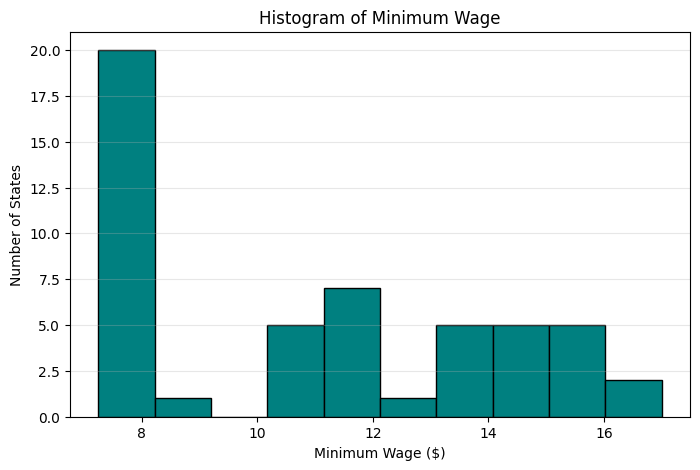

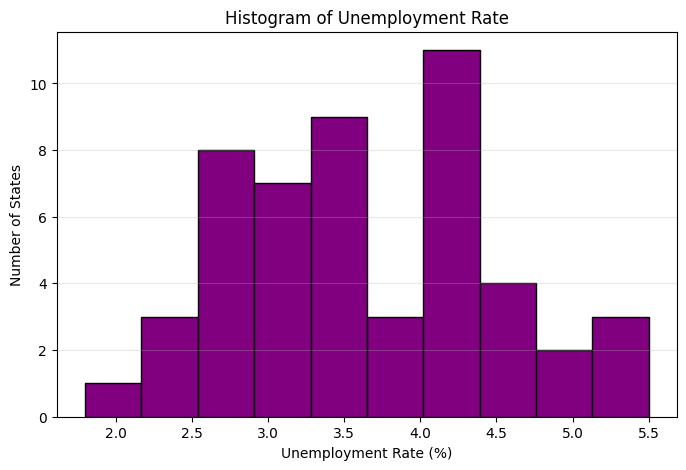

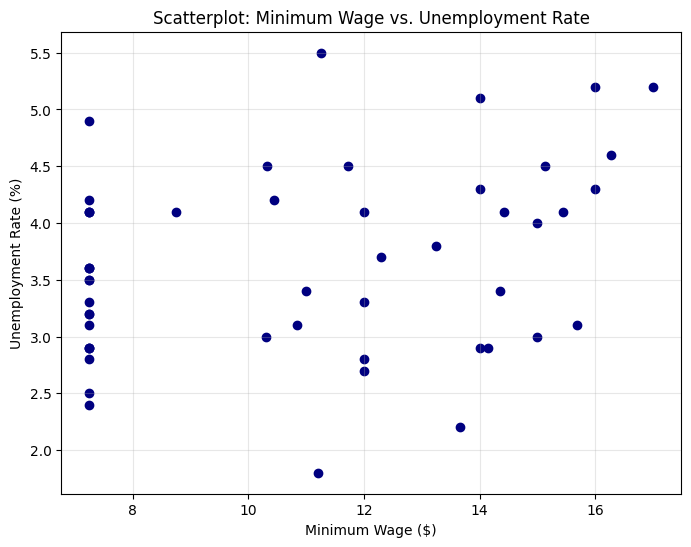


Correlation between Minimum Wage and Unemployment Rate: 0.2928738428441554


In [19]:
# Exploratory Data Analysis here
print("=== Basic Information ===")
display(data.info())

print("\n=== Summary Statistics ===")
display(data.describe())

print("\n=== First 10 Rows of Cleaned Data ===")
display(data.head(10))


# ----------------------------
# HISTOGRAMS
# ----------------------------

# Histogram: Minimum Wage
plt.figure(figsize=(8,5))
plt.hist(data['MinimumWage'], bins=10, color='teal', edgecolor='black')
plt.title('Histogram of Minimum Wage')
plt.xlabel('Minimum Wage ($)')
plt.ylabel('Number of States')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Histogram: Unemployment Rate
plt.figure(figsize=(8,5))
plt.hist(data['UnemploymentRate'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Number of States')
plt.grid(axis='y', alpha=0.3)
plt.show()


# ----------------------------
# Scatterplot (still recommended)
# ----------------------------

plt.figure(figsize=(8,6))
plt.scatter(data['MinimumWage'], data['UnemploymentRate'], color='navy')
plt.title('Scatterplot: Minimum Wage vs. Unemployment Rate')
plt.xlabel('Minimum Wage ($)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation coefficient
correlation = data['MinimumWage'].corr(data['UnemploymentRate'])
print("\nCorrelation between Minimum Wage and Unemployment Rate:", correlation)




## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

Null Hypothesis: H0: Minimum wage has no effect on unemployment rate (β1 = 0).
Alternative Hypothesis: H1: Minimum wage does affect unemployment rate (β1 ≠ 0).

=== OLS Regression Results ===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       UnemploymentRate   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.597
Date:                Fri, 12 Dec 2025   Prob (F-statistic):             0.0370
Time:                        03:41:51   Log-Likelihood:                -59.833
No. Observations:                  51   AIC:                             123.7
Df Residuals:                      49   BIC:                             127.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8638      0.380      7.532      0.000       2.100       3.628
MinimumWage     0.0717      0.033      2.144      0.037       0.004       0.139
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.179
Skew:                          -0.023   Prob(JB):                        0.914
Kurtosis:                       2.713   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

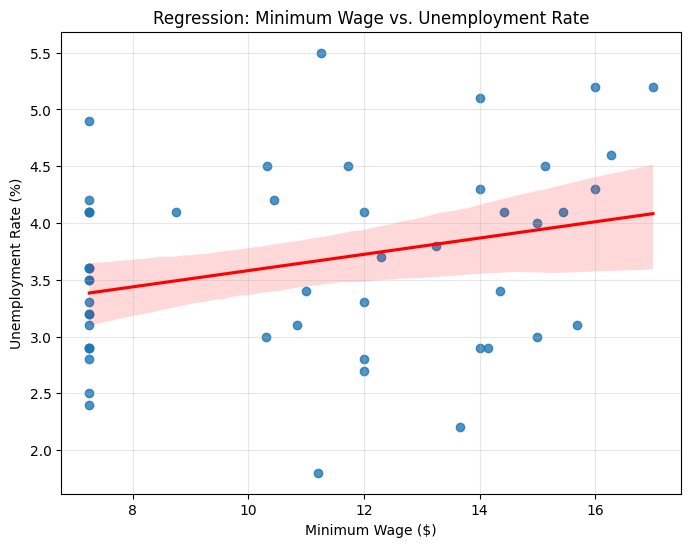

In [20]:
# Build and run your model here
# Inspect your column names (optional but helpful)
null_hypothesis = "H0: Minimum wage has no effect on unemployment rate (β1 = 0)."
alt_hypothesis = "H1: Minimum wage does affect unemployment rate (β1 ≠ 0)."

print("Null Hypothesis:", null_hypothesis)
print("Alternative Hypothesis:", alt_hypothesis)

### 2. Statistical Model
# Ordinary Least Squares (OLS):
# UnemploymentRate = β0 + β1 * MinimumWage + ε

model = smf.ols('UnemploymentRate ~ MinimumWage', data=data).fit()

### 3. Model Results
print("\n=== OLS Regression Results ===")
display(model.summary())

### 4. Visualization of Regression Line
plt.figure(figsize=(8,6))
sns.regplot(x='MinimumWage', y='UnemploymentRate', data=data, ci=95, line_kws={'color': 'red'})
plt.title("Regression: Minimum Wage vs. Unemployment Rate")
plt.xlabel("Minimum Wage ($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True, alpha=0.3)
plt.show()